In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load dataset
data_path = '/content/Unemployment in India.csv'
df = pd.read_csv(data_path)

In [3]:
# Display basic info
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Head:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76

In [4]:
# Handling categorical data if present
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [6]:
# Define features and target
# Check actual column names in your DataFrame (e.g., print(df.columns))
# Adjust the column name below accordingly
X = df.drop(columns=[' Estimated Unemployment Rate (%)'])  # Assuming 'Estimated Unemployment Rate (%)' is the target, replace with actual column name
y = df[' Estimated Unemployment Rate (%)'] # Replace with actual column name

In [7]:
# Convert target into categorical (e.g., High/Low unemployment)
thresh = y.median()
y = (y > thresh).astype(int)  # 1 if above median, 0 otherwise

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train a RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


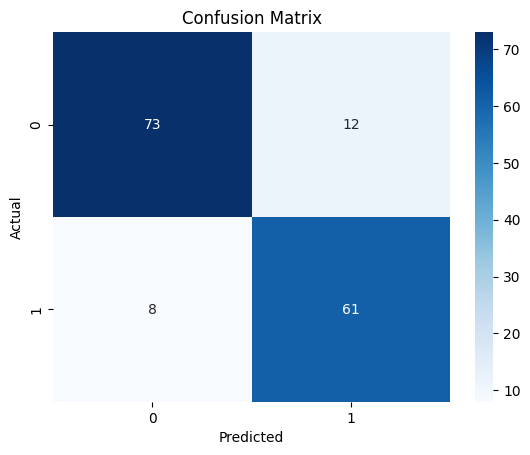

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        85
           1       0.84      0.88      0.86        69

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154



In [14]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

<ipython-input-15-43dc6e78af6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


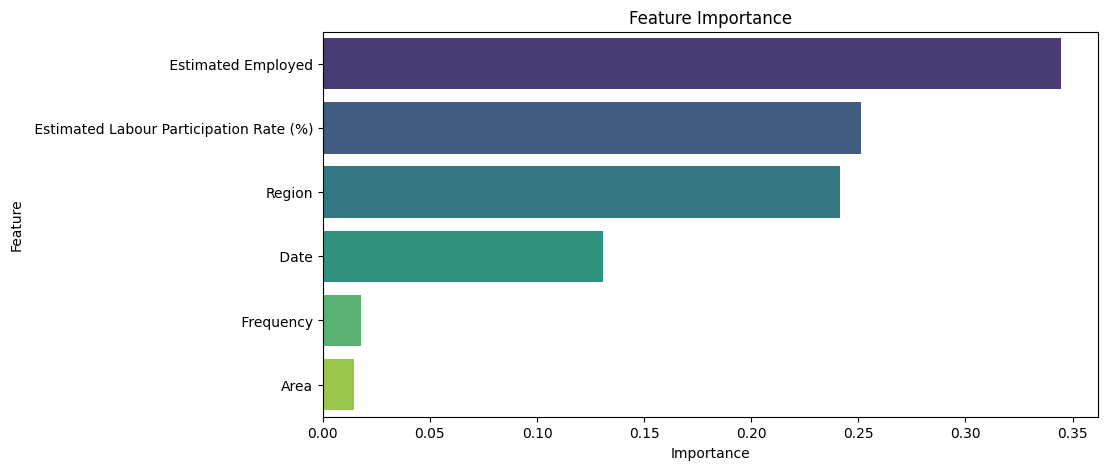

In [15]:
# Plot Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.show()

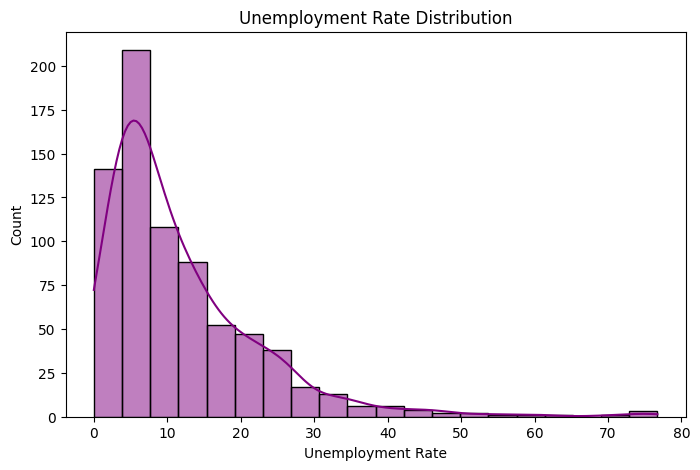

In [17]:
# Visualizing unemployment rate distribution
plt.figure(figsize=(8,5))
# Check the actual column name for unemployment rate in your DataFrame (df.columns)
# Replace 'Estimated Unemployment Rate (%)' with the correct column name if different
sns.histplot(df[' Estimated Unemployment Rate (%)'], bins=20, kde=True, color='purple')
plt.title('Unemployment Rate Distribution')
plt.xlabel('Unemployment Rate')
plt.ylabel('Count')
plt.show()